# Introduction

## Main idea:
We need to compress our data. 

For this frequently used symbols can be encoded as shorter codewords than rarerly used symbols.

## Main limit:
Codeword can not be begining of the another codeword.

In [1]:
from datetime import timedelta
from IPython.display import YouTubeVideo

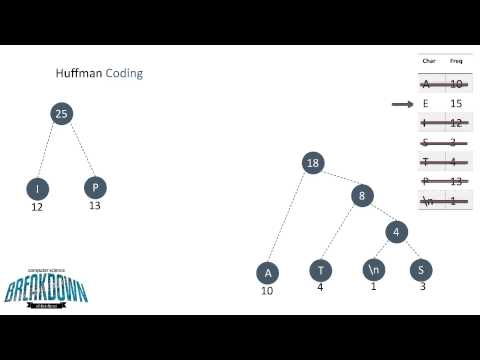

In [2]:
YouTubeVideo("dM6us854Jk0")


# Work space

Functions are from <a href="https://gist.github.com/jasonrdsouza/1c9c895f43497d15eb2e" target="_blank">this repository</a> 

In [3]:
import collections
from queue import PriorityQueue, Queue
import numpy as np


In [4]:
# Message:
string = 'Hello, world'
# Split it to symbols and make a tuple:
symbol_list = tuple(string)
print(symbol_list)


('H', 'e', 'l', 'l', 'o', ',', ' ', 'w', 'o', 'r', 'l', 'd')


In [5]:
# Count how frequently each symbol appears
counts = collections.Counter(symbol_list).most_common()
print(counts)


[('l', 3), ('o', 2), ('H', 1), ('e', 1), (',', 1), (' ', 1), ('w', 1), ('r', 1), ('d', 1)]


In [6]:
symb = int(np.ceil(np.log2(len(counts))))
print(str(symb) + ' bits are required for the encoding of each symbol.')
print('Total number of the bits that required for the encoding of the message is '+ str(symb*len(string)) + '.' )


4 bits are required for the encoding of each symbol.
Total number of the bits that required for the encoding of the message is 48.


In [7]:
def sortByWeight(inputStr):
        return inputStr[1]


In [8]:
counts.sort(key=sortByWeight)
print(counts)


[('H', 1), ('e', 1), (',', 1), (' ', 1), ('w', 1), ('r', 1), ('d', 1), ('o', 2), ('l', 3)]


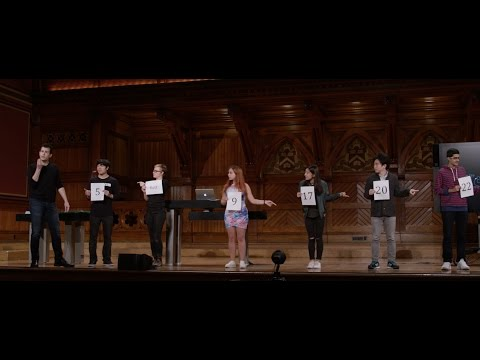

In [9]:
# Make queue
#queues = PriorityQueue()
queues = Queue()
start=int(timedelta(hours=0, minutes=56, seconds=7).total_seconds())
# What is a queue (data structure)
YouTubeVideo("pA-8eBZvN1E", start=start, autoplay=1, theme="light", color="red")


In [10]:
# Put the elements into the queue
for (val,count) in counts:
    queues.put((count, val), block=True)


In [11]:
total = len(symbol_list)
largest_node_count = 0 # initial point

# Create the Huffman tree
while total != largest_node_count:
    node1 = queues.get_nowait() # 1st element from the current queue 
    node2 = queues.get_nowait() # 2nd element from the current queue
    print(largest_node_count)
    print(node1)
    print(node2)
    new_count = node1[0] + node2[0] # sum weights (frequency)
    # update largest count if new count larger than previous:
    largest_node_count = new_count if new_count > largest_node_count else largest_node_count 
    queues.put((new_count, (node1,node2))) # put new elements (actually, sub-trees) into the queue


0
(1, 'H')
(1, 'e')
2
(1, ',')
(1, ' ')
2
(1, 'w')
(1, 'r')
2
(1, 'd')
(2, 'o')
3
(3, 'l')
(2, ((1, 'H'), (1, 'e')))
5
(2, ((1, ','), (1, ' ')))
(2, ((1, 'w'), (1, 'r')))
5
(3, ((1, 'd'), (2, 'o')))
(5, ((3, 'l'), (2, ((1, 'H'), (1, 'e')))))
8
(4, ((2, ((1, ','), (1, ' '))), (2, ((1, 'w'), (1, 'r')))))
(8, ((3, ((1, 'd'), (2, 'o'))), (5, ((3, 'l'), (2, ((1, 'H'), (1, 'e')))))))


In [12]:
# Get the binary tree structure
huffman_tree_root = queues.get(False)
print(huffman_tree_root)


(12, ((4, ((2, ((1, ','), (1, ' '))), (2, ((1, 'w'), (1, 'r'))))), (8, ((3, ((1, 'd'), (2, 'o'))), (5, ((3, 'l'), (2, ((1, 'H'), (1, 'e')))))))))


# Implementation

In [13]:
def huffman_tree_to_table(root, prefix, lookup_table):
    """Converts the Huffman tree rooted at "root" to a lookup table"""
    if type(root[1]) != tuple:
        # leaf node
        lookup_table[root[1]] = prefix
    else:
        huffman_tree_to_table(root[1][0], prefix + "0", lookup_table) #recursion
        huffman_tree_to_table(root[1][1], prefix + "1", lookup_table) #recursion
    return lookup_table


In [14]:
def huffman(symbol_list):
    #find the frequency of each symbol appearance
    counts = collections.Counter(symbol_list).most_common()
    counts.sort(key=sortByWeight)
    print(counts)
    total = len(symbol_list)
    #queues = PriorityQueue()
    queues = Queue()
    for (val,count) in counts:
        queues.put((count, val), block=True)
    largest_node_count = 0
    # Create the Huffman tree
    print('Start to build tree')
    while total != largest_node_count:
        node1 = queues.get_nowait()
        node2 = queues.get_nowait()
        print(largest_node_count)
        print(node1)
        print(node2)
        new_count = node1[0] + node2[0]
        largest_node_count = new_count if new_count > largest_node_count else largest_node_count
        queues.put((new_count, (node1,node2)))
    print('Finish to build tree')
    huffman_tree_root = queues.get(False)
    
    # generate the symbol to huffman code mapping
    lookup_table = huffman_tree_to_table(huffman_tree_root, "", {})
    return lookup_table


In [15]:
#a = tuple('If I have seen further it is by standing on ye sholders of Giants.')
a = tuple('Hello, world')
huff_table = huffman(a)


[('H', 1), ('e', 1), (',', 1), (' ', 1), ('w', 1), ('r', 1), ('d', 1), ('o', 2), ('l', 3)]
Start to build tree
0
(1, 'H')
(1, 'e')
2
(1, ',')
(1, ' ')
2
(1, 'w')
(1, 'r')
2
(1, 'd')
(2, 'o')
3
(3, 'l')
(2, ((1, 'H'), (1, 'e')))
5
(2, ((1, ','), (1, ' ')))
(2, ((1, 'w'), (1, 'r')))
5
(3, ((1, 'd'), (2, 'o')))
(5, ((3, 'l'), (2, ((1, 'H'), (1, 'e')))))
8
(4, ((2, ((1, ','), (1, ' '))), (2, ((1, 'w'), (1, 'r')))))
(8, ((3, ((1, 'd'), (2, 'o'))), (5, ((3, 'l'), (2, ((1, 'H'), (1, 'e')))))))
Finish to build tree


![image.png](https://raw.githubusercontent.com/kirlf/communication_stuff/master/AudioCoding/tutorials/assets/huff_tree.png)

In [16]:
print('Huffman table:')
print(huff_table)
enc = ''
for i in string:
    enc = enc+huff_table[i]
print('Encoded message:\n'+enc)
print(str(len(enc)) + ' bits are required to encode whole message by Huffman.')

Huffman table:
{',': '000', ' ': '001', 'w': '010', 'r': '011', 'd': '100', 'o': '101', 'l': '110', 'H': '1110', 'e': '1111'}
Encoded message:
11101111110110101000001010101011110100
38 bits are required to encode whole message by Huffman.
